# Custom Data Example

In [27]:
import numpy as np
import networkx as nx
import pandas as pd
import scipy as sc

In [28]:
# this cell is generating some synthetic graph dataset with node features. 


#defining limits on number of nodes
n_min = 20
n_max = 50

#number of graphs
num_g = 100

# number of node features - in this example I will generate random node features that aren't useful for classifcation
n_nf = 3


# empty list of graphs and labels
graphs = []
labels = []
node_features = []


# setting limits on probability of edge existing for random graphs
p_min = 0.1
p_max = 0.5

# adding 50 random graphs (label 0)
for i in range(int(num_g/2)):
    rand_n = np.random.randint(n_min,n_max)
    rand_p = np.random.randint(int(p_min*100),int(p_max*100))/100   
    
    g = nx.fast_gnp_random_graph(rand_n,rand_p)    
    node_feat_matrix = np.random.random((rand_n,n_nf))
    
    graphs.append(nx.to_numpy_array(g))
    node_features.append(node_feat_matrix)
    
    labels.append(0)

# setting limits on number of edges to add per node
m_min = 1
m_max = 5

# adding 50  powerlaw cluster graphs (label 1)
for i in range(int(num_g/2)):
    rand_n = np.random.randint(n_min,n_max)
    rand_p = np.random.randint(int(p_min*100),int(p_max*100))/100   
    rand_m = np.random.randint(m_min,m_max)
    
    g = nx.powerlaw_cluster_graph(rand_n, rand_m, rand_p)
    node_feat_matrix = np.random.random((rand_n,n_nf))
    
    graphs.append(nx.to_numpy_array(g))
    node_features.append(node_feat_matrix)

    labels.append(1)

We now have three lists of length 100. The graphs list is composed of numpy arrays that represent the adjacency matrix of the graph. The node features list is composed of numpy arrays that contain the node information for each graph. The labels list is a list of integers that corresponds to the class label for each graph.

The next step is to take this data and convert it into an appropriate format for hcga.

In [29]:
# converting this data into the format required for hcga

from hcga.graph import Graph, GraphCollection

# create graph collection object
g_c = GraphCollection()


# looping over each graph and appending it to the graph collection object
for i,A in enumerate(graphs):
    
    # generating a sparse matrix
    sA = sc.sparse.coo_matrix(A)
    
    # extracting edge list from scipy sparse matrix
    edges = np.array([sA.row,sA.col,sA.data]).T
    
    # passing edge list to pandas dataframe
    edges_df = pd.DataFrame(edges, columns = ['start_node', 'end_node', 'weight'])

    # creating node ids based on size of adjancency matrix
    nodes = np.arange(0,A.shape[0])
    
    # loading node ids into dataframe
    nodes_df = pd.DataFrame(index=nodes)

    # each node should have the same number of node features across all graphs
    # converting node features array to list such that each node is assigned a list.
    nodes_df['attributes'] = node_features[i].tolist()

    # extracting graph label from labels
    graph_label = [labels[i]]
    
    # create a single graph object
    graph = Graph(nodes_df, edges_df, graph_label)

    # add new graph to the collection
    g_c.add_graph(graph)


In [30]:
# perform some sanity checks

print('There are {} graphs'.format(len(g_c.graphs)))
print('There are {} features per node'.format(g_c.get_n_node_features()))


There are 100 graphs
There are 3 features per node


In [31]:
# we can save this if we want to and run everything from the command line
from hcga.io import save_dataset

save_dataset(g_c, 'custom_dataset_classification', folder='./datasets')

# Extracting features

We have now produced a pickle dataset of your own custom data. We can now run the feature extraction from the command line using the following commands:

hcga extract_features ./datasets/custom_dataset.pkl -m fast -n 4 -sl advanced --timeout 10 


Alternatively,we could import the Hcga class and run the feature extraction and analysis from within the notebook. We will do this below.

In [32]:
from hcga.io import load_dataset

graphs = load_dataset('./datasets/custom_dataset_classification.pkl')

In [33]:
#import hcga object
from hcga.hcga import Hcga

# define an object
h = Hcga()

#assigning the graphs field to the recently created dataset
h.graphs = graphs

In [34]:
# extracting all features here
h.extract(mode='fast',n_workers=4,timeout=2)

# saving all features into a pickle
h.save_features('./results/custom_dataset_classification/all_features.pkl')


Returning the maximal subgraph for each graph


invalid value encountered in double_scalars
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
divide by zero encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
An input array is constant; the correlation coefficent is not defined.
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide


Extracting features from 100 graphs (we disabled 0 graphs).
Computing features for 100 graphs:


  0%|          | 0/100 [00:00<?, ?it/s]Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
  1%|          | 1/100 [00:01<02:59,  1.82s/it]divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
Mean of empty slice.
invalid value encountered in double_scalars
  3%|▎         | 3/100 [00:02<01:40,  1.04s/it]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
Mean of empty slice.
invalid value encountered i

Mean of empty slice.
DEBUG:Feature exceptions:Failed feature minimum_cycle_length for graph 46 with exception: zero-size array to reduction operation minimum which has no identity
DEBUG:Feature exceptions:Failed feature min_edge_cover for graph 46 with exception: Graph has a node with no edge incident on it, so no edge cover exists.
invalid value encountered in double_scalars
invalid value encountered in double_scalars
invalid value encountered in double_scalars
Degrees of freedom <= 0 for slice
invalid value encountered in double_scalars
 43%|████▎     | 43/100 [00:23<00:27,  2.06it/s]Degrees of freedom <= 0 for slice
divide by zero encountered in log
invalid value encountered in double_scalars
invalid value encountered in true_divide
DEBUG:Feature exceptions:Failed feature edge betweenness centrality_hmean for graph 46 with exception: Harmonic mean only defined if all elements greater than or equal to zero
DEBUG:Feature exceptions:Failed feature minimum_cycle_length for graph 47 with

DEBUG:Feature exceptions:Failed feature edge_weights_max for graph 47 with exception: zero-size array to reduction operation maximum which has no identity
DEBUG:Feature exceptions:Failed feature degree_assortativity_coeff_pearson for graph 46 with exception: not enough values to unpack (expected 2, got 0)
DEBUG:Feature exceptions:Failed feature edge_weights_mode for graph 47 with exception: index 0 is out of bounds for axis 0 with size 0
DEBUG:Feature exceptions:Failed feature edge_weights_kstat for graph 47 with exception: Data input must not be empty
DEBUG:Feature exceptions:Failed feature edge_weights_kstatvar for graph 47 with exception: Data input must not be empty
DEBUG:Feature exceptions:Failed feature edge_weights_tmin for graph 47 with exception: No array values within given limits
DEBUG:Feature exceptions:Failed feature edge_weights_tmax for graph 47 with exception: No array values within given limits
divide by zero encountered in double_scalars
invalid value encountered in d

DEBUG:Feature exceptions:Failed feature minimum_cycle_length for graph 77 with exception: zero-size array to reduction operation minimum which has no identity
 74%|███████▍  | 74/100 [00:38<00:14,  1.76it/s]divide by zero encountered in log
divide by zero encountered in double_scalars
DEBUG:Feature exceptions:Failed feature minimum_cycle_length for graph 78 with exception: zero-size array to reduction operation minimum which has no identity
 75%|███████▌  | 75/100 [00:38<00:12,  2.00it/s]divide by zero encountered in log
divide by zero encountered in double_scalars
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
 76%|███████▌  | 76/100 [00:39<00:11,  2.00it/s]divide by zero encountered in log
Mean of empty slice.
invalid value encountered in double_scalars
 77%|███████▋  | 77/100 [00:39<00:11,  2.07it/s]Mean of empty slice.
invalid value encountered in double_scalars
divide by zero encountered in double_scalars
Mean of empty slice.
invalid value

628 feature extracted.
373 valid features.


# Analysis - classification example

In [35]:
# load the saved features

h.load_features('./results/custom_dataset_classification/all_features.pkl')

INFO:hcga.analysis:628 total features
INFO:hcga.utils:2 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:581 valid features
INFO:hcga.analysis:581 with interpretability 1
INFO:hcga.analysis:... Using Xgboost classifier ...
INFO:hcga.analysis:Using kfold
INFO:hcga.analysis:Using 10 splits
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 0.9 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 0.889 ---
INFO:hcga.analysis:Fold accuracy: --- 0.889 ---
INFO:hcga.analysis:Accuracy: 0.968 +/- 0.049
INFO:hcga.analysis:Now using a reduced set of 101 features with < 0.9 correlat

Sample Expanded Feature Summary for Class 0


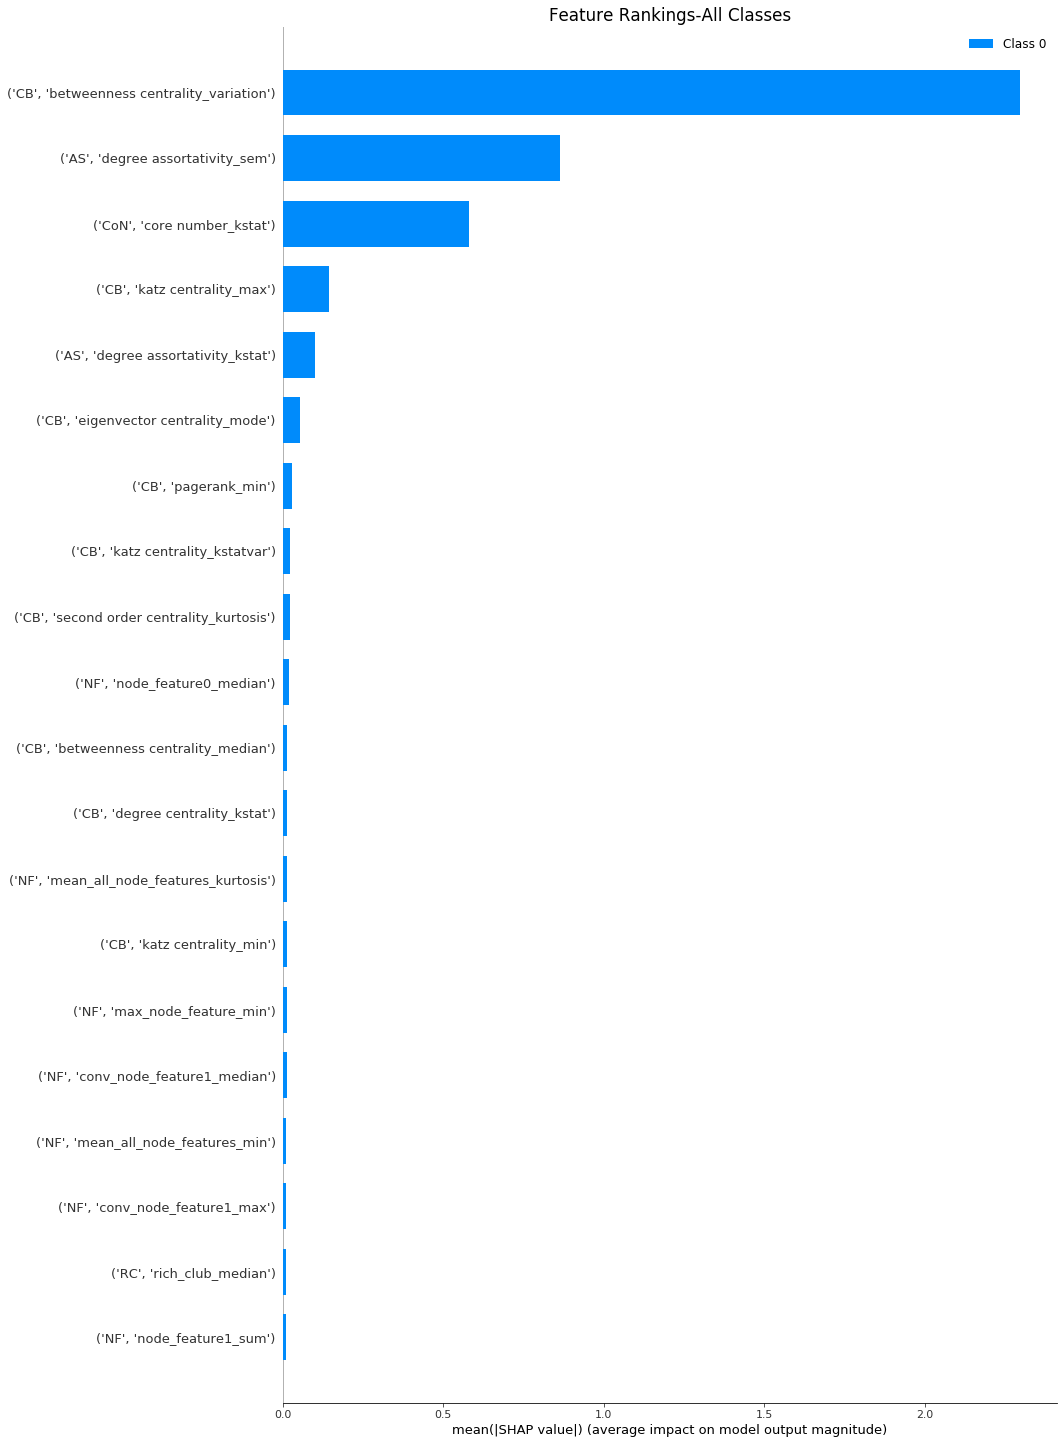

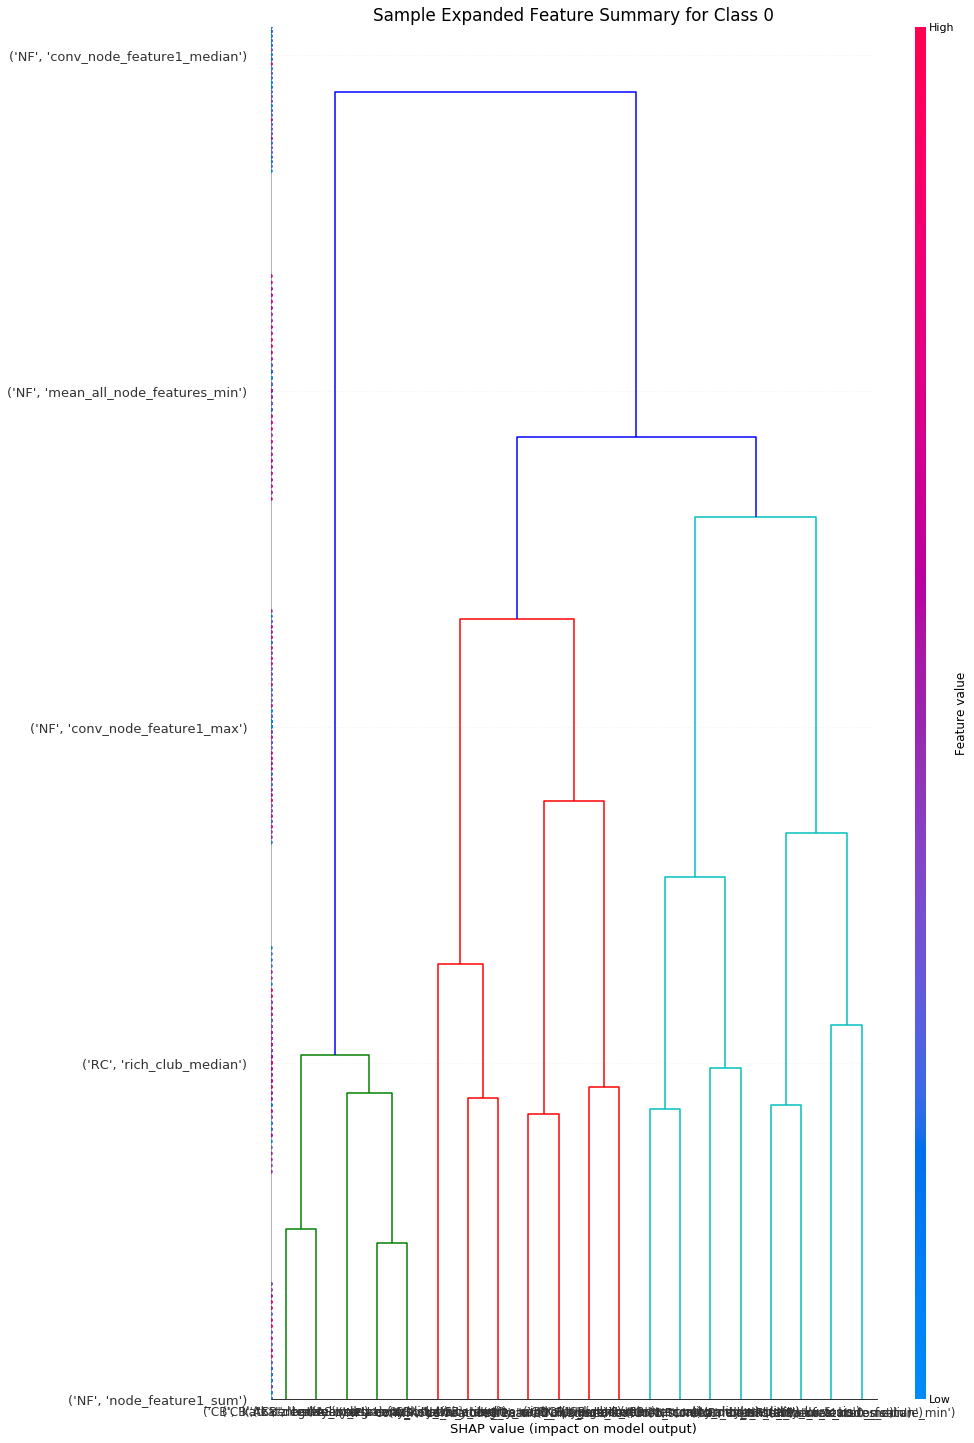

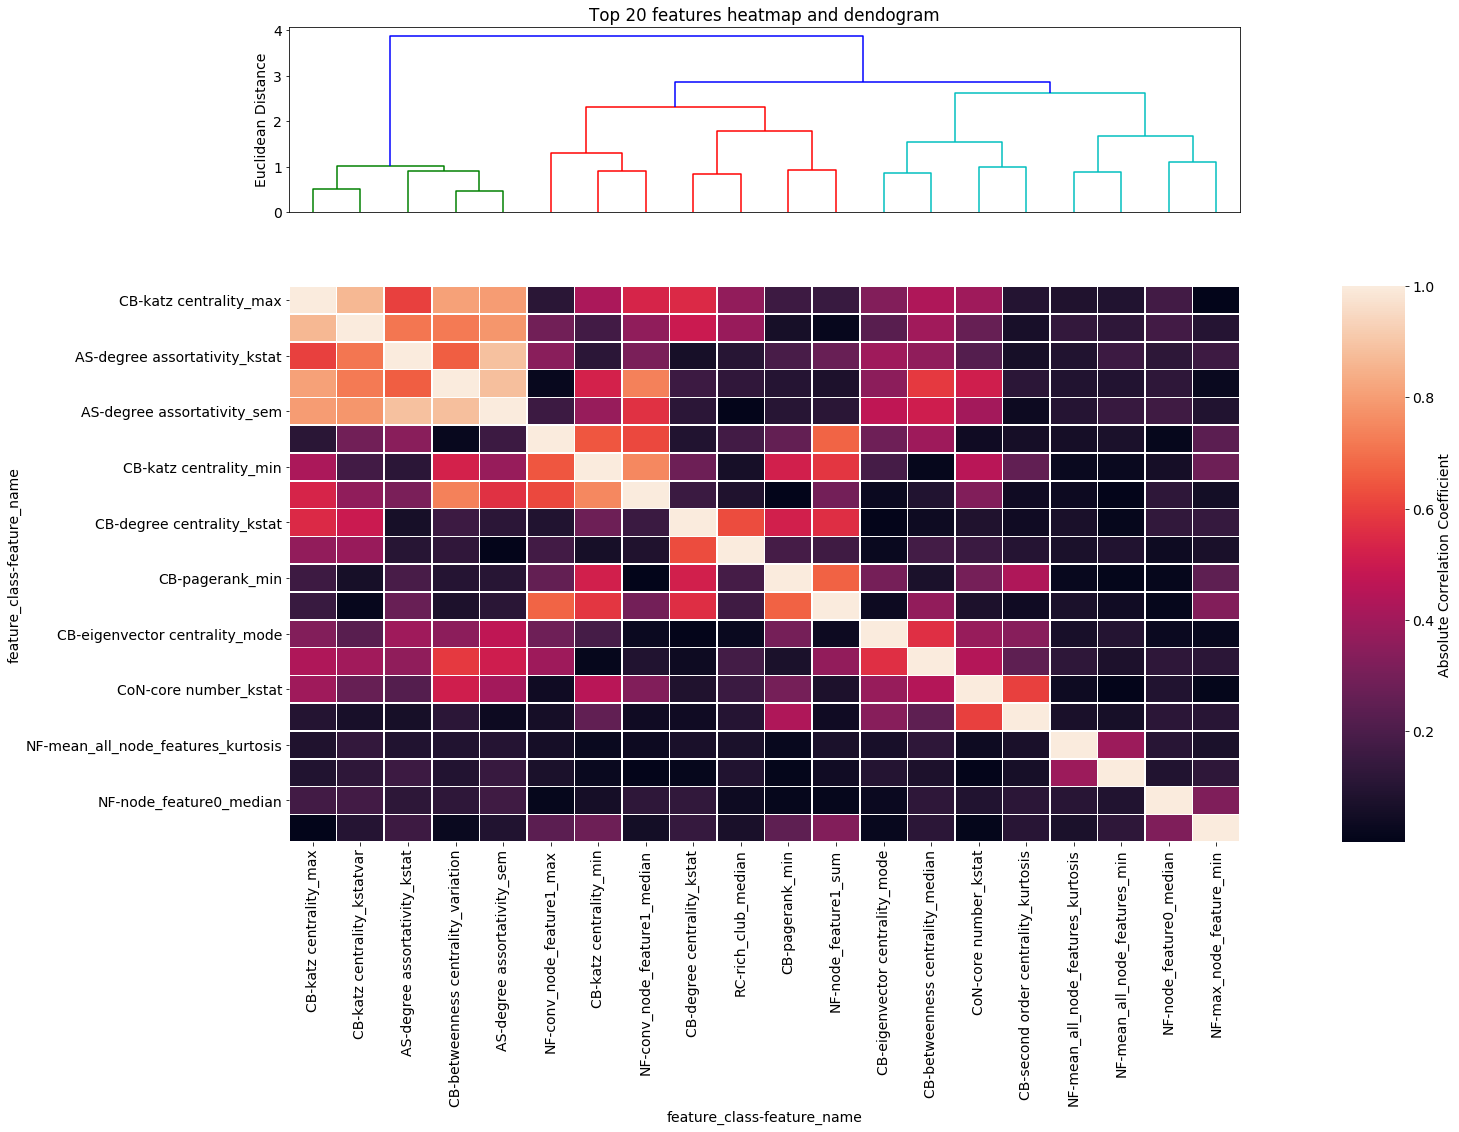

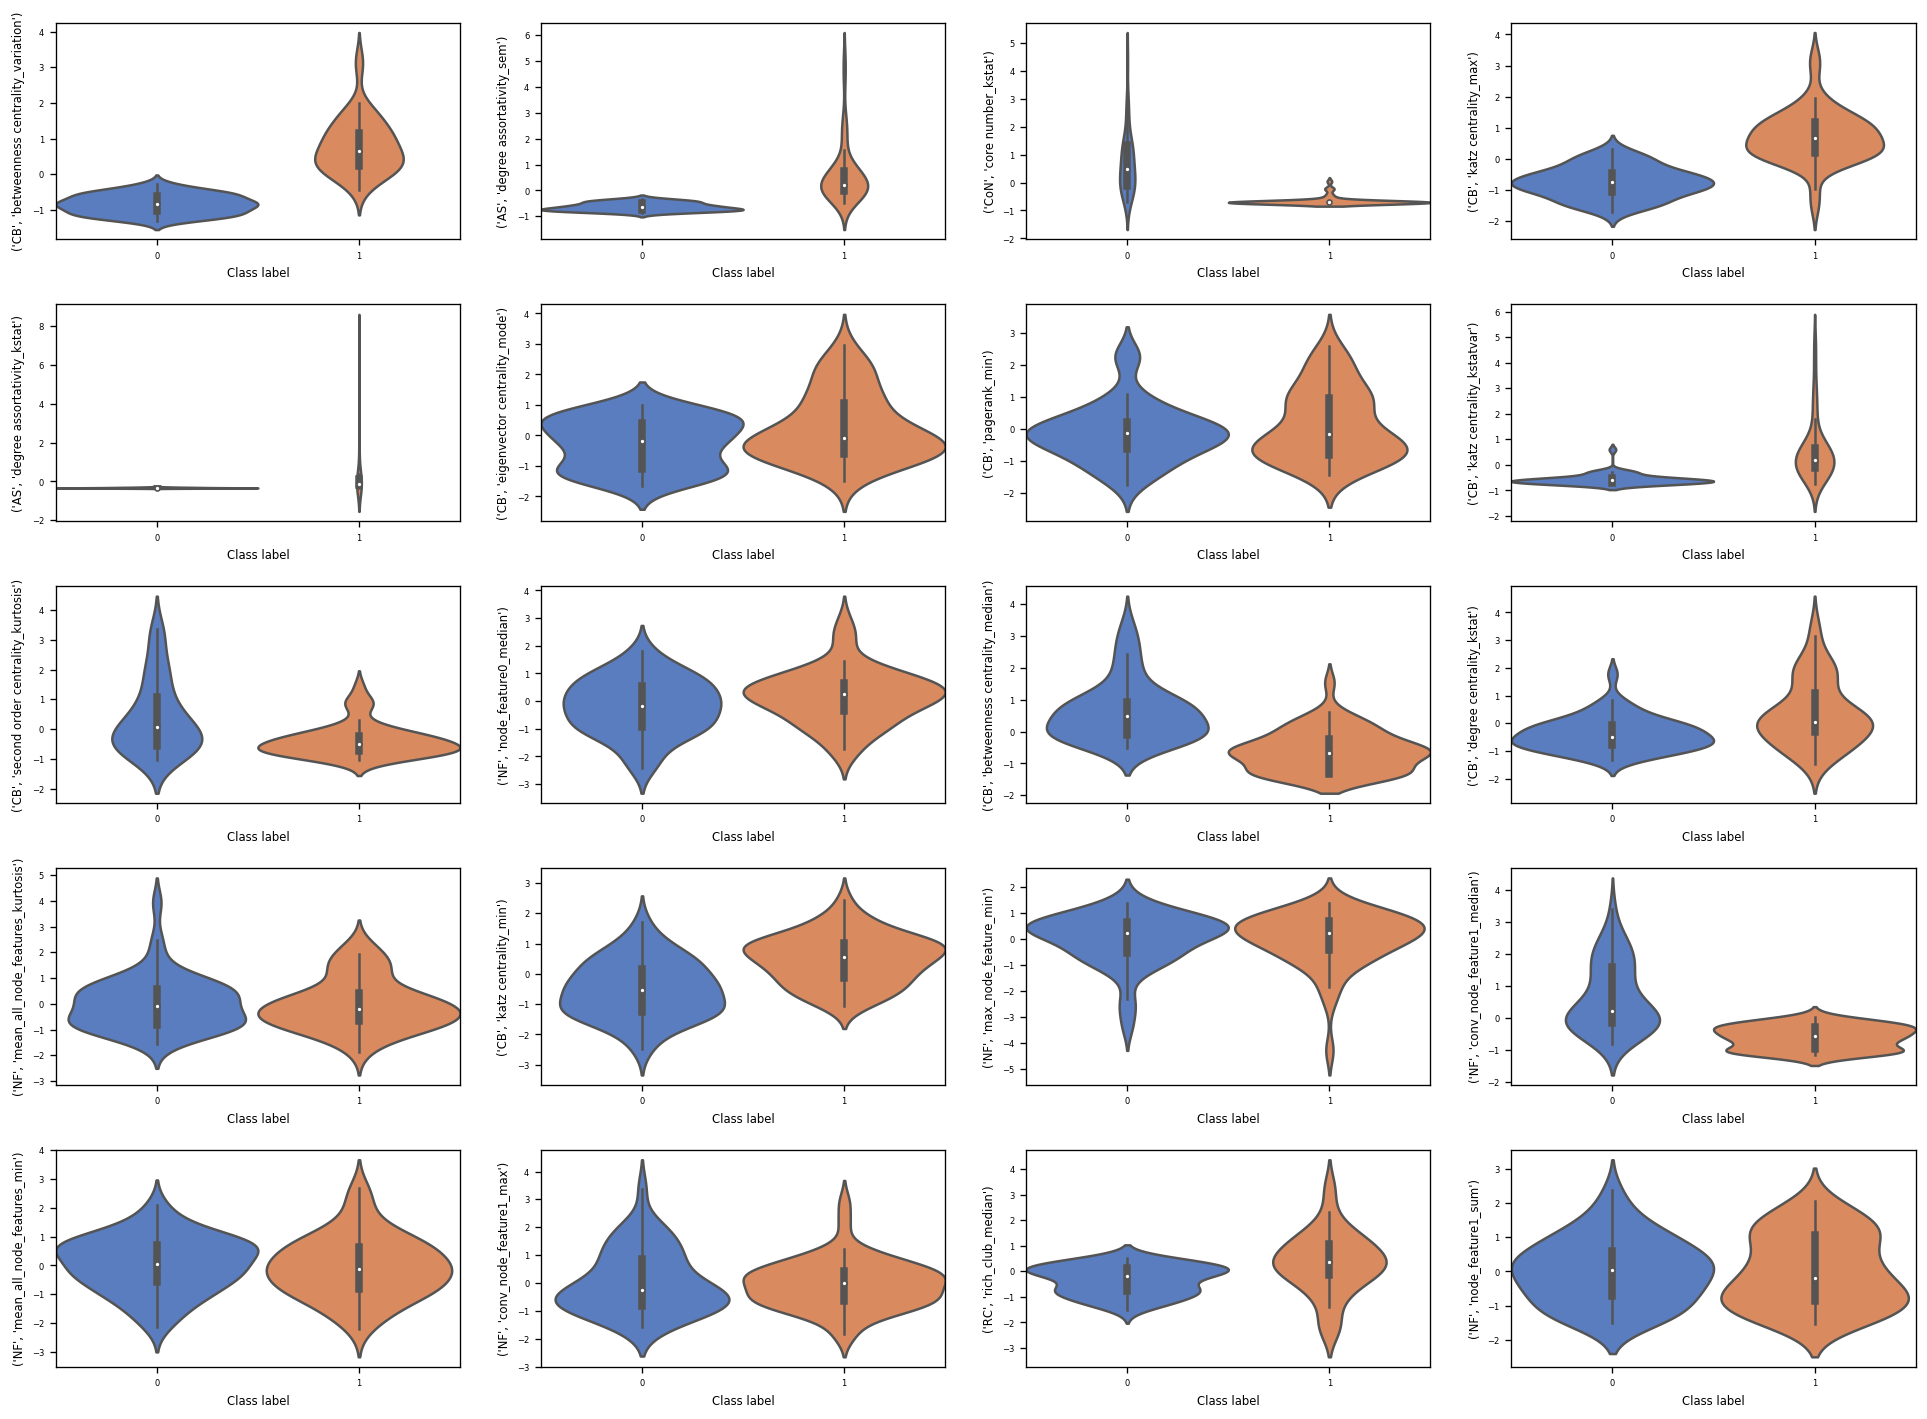

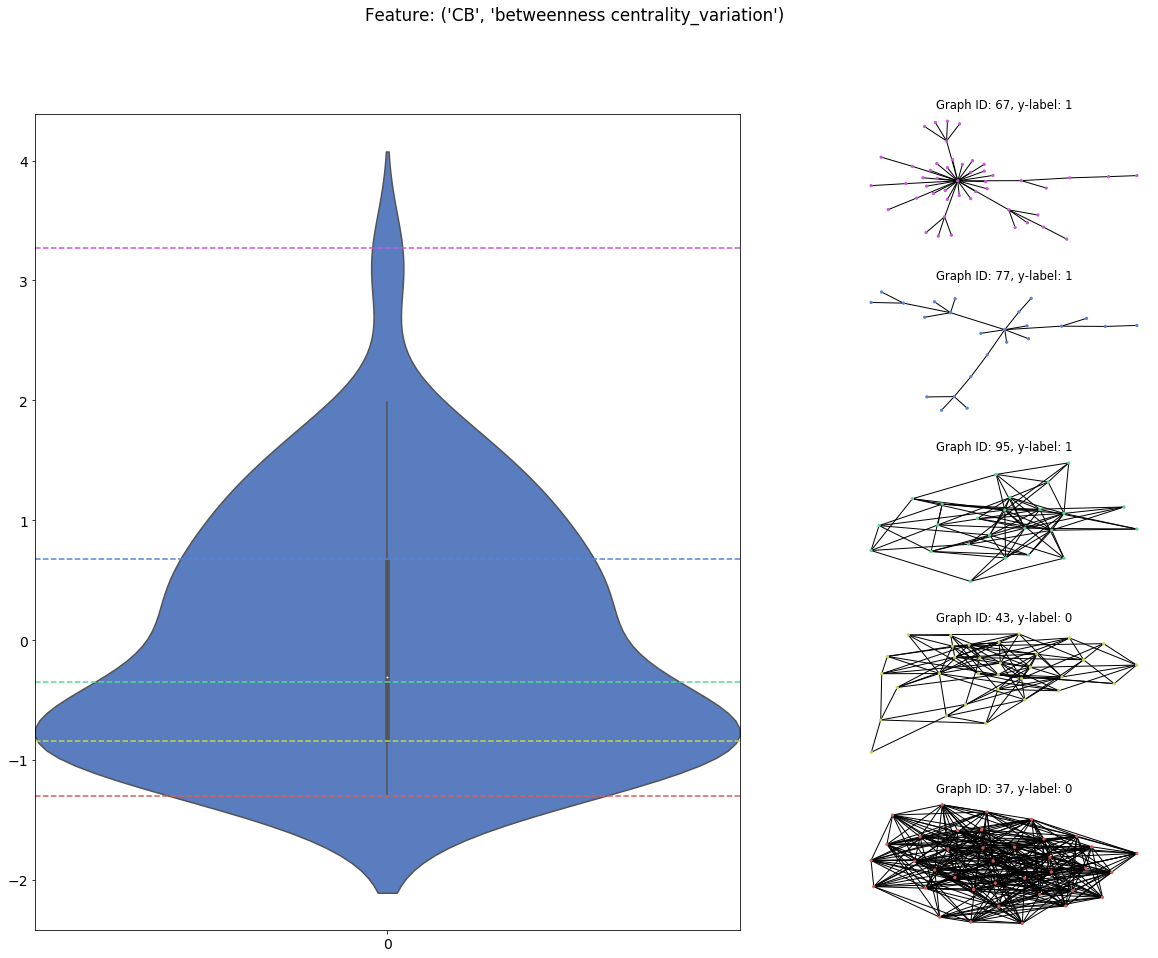

In [36]:
# implement a classification analyse of the features
h.analyse_features(feature_file='./results/custom_dataset_classification/all_features.pkl',results_folder='./results/custom_dataset_classification')
